____

<font size=+4 color=#33EE66> ICA: Regularization and Polynomial Features </font>

____

Happy Valentines Day! ❤️

You will explore many of the topics we discussed on Monday. We will use a regression dataset already familiar to you - the `sklearn` diabetes dataset. This dataset is nice because it has many features, and we can create even more with [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). 

First, take a moment to say hello to your group mates and introduce yourself if you don't already know everyone. 

Second, have a high-level planning discussion with your group about how to spend your time. There are a lot of ideas here! And, keep in mind that this isn't due until <font  color=#DD2266>Saturday at midnight</font>, so you can work with your group for the rest of the week if you wanted to. 🥳

Here are the various parts:
1. remind yourself of the diabetes dataset
2. understand [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) in a bit more detail
3. vary the regularization parameters in this estimator and explore their consequences
4. make regularization path plots
5. re-do everything with polynomial features


Don't forget to add your group members name on the submitted document.

### Name: Angqi Li, Yash Vikas Mandlecha, Patrick Govan

____

<font size=+2 color=#FFAA00> Basic Code Setup </font>

____

I provide here the basic starter code. Read through this and make sure you understand it. You'll be modifying as you work through the ICA.

Pay particular attention to the outputs and scores. 



Coefficients: 
 [  48.62227708 -154.7208639   447.91701648  295.79402321  -41.56079618
  -87.91621024 -204.29009667  145.31178285  337.1167957   135.09554647]

Mean squared error: 2868.35

Coefficient of determination: 0.46 



/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


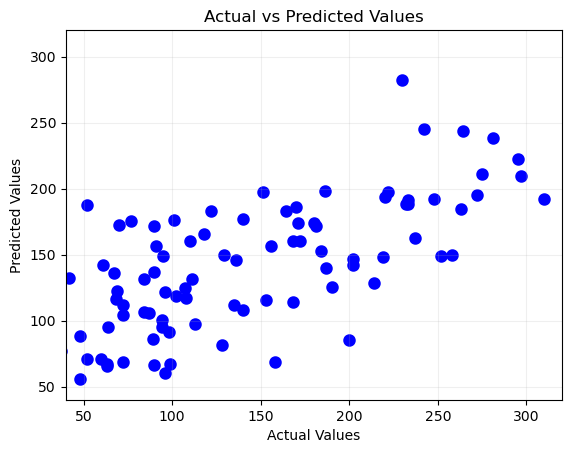

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# linear regression object with SGD
sgd_regressor = SGDRegressor(max_iter=5000, tol=1e-3)

# train the model
sgd_regressor.fit(X_train, y_train)

# make predictions
y_pred = sgd_regressor.predict(X_test)

# these will become important as we vary our loss function
print('\nCoefficients: \n', sgd_regressor.coef_)
print('\nMean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('\nCoefficient of determination: %.2f \n' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(40,320)
plt.ylim(40,320)
plt.title('Actual vs Predicted Values')
plt.grid(alpha=0.2)


____

<font size=+2 color=#FFAA00> SGDRegressor Options </font>

____

Examine the options for this [estimator](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) you are using. In a markdown cell, list the options that control regularization, either for L1, L2 or Elastic Net (EN). What are the defaults and how do you change them? 

Comment on the defaults. Is regularization "on" by default? Or, do you need to "turn it on"?  Do you think, from what you know so far, that the defaults are reasonable?  You may need to play with the above code a bit to answer this question; for example, you could start by swapping in and out `penalty = None`, as well as the other options. 

How many parameters does EN use and how do you communicate that to `sklearn`?

There is an important lesson here on the use of `sklearn`: the estimators tend to be very "dressed up", and almost never do what the simple title (e.g., "linear regression") implies. 😳



---

### Regularization Options for SGDRegressor

#### Regularization Parameters:
1. `penalty`: Specifies the norm used in the penalization. Options include:
   - `'l1'`: L1 regularization.
   - `'l2'`: L2 regularization.
   - `'elasticnet'`: Elastic Net regularization which combines L1 and L2 penalties.

2. `alpha`: Constant that multiplies the regularization term. The higher the value, the stronger the regularization.

3. `l1_ratio`: The Elastic Net mixing parameter, with 0 <= `l1_ratio` <= 1. For `l1_ratio = 0`, the penalty is an L2 penalty. For `l1_ratio = 1`, it is an L1 penalty. For `0 < l1_ratio < 1`, the penalty is a combination of L1 and L2.

And also we experimented with the choice of the regularization term/penalty , namely l1, l2 and elastic net and changed the parameters alpha for l1, l2 and l1_ratio for the elastic net. The error got worse as I increased alpha to 0.1 from 0.001 and changing l1_ratio from 0.2 to 0.8 made no difference on the implementation with elastic net.

#### Defaults:
Regularization is "on" by default in `SGDRegressor`, with L2 regularization (`penalty = 'l2'`) being applied by default. To turn off regularization, set `penalty = None`. 
- `penalty`: `'l2'`
- `alpha`: 0.0001
- `l1_ratio`: 0.15 (only used for Elastic Net penalty, ignored otherwise)

when I change the penalty parameters ('l1','l2','elasticnet' and None) for `SGDRegressor`, we found out that the MSE didn't change much. Also for the coefficient of determination isn't change much.

#### How many parameters EN have and how u communicate:
- For Elastic Net regularization, adjust `l1_ratio` as desired. `l1_ratio`: The Elastic Net mixing parameter, with 0 <= `l1_ratio` <= 1. For `l1_ratio = 0`, the penalty is an L2 penalty. For `l1_ratio = 1`, it is an L1 penalty. For `0 < l1_ratio < 1`, the penalty is a combination of L1 and L2.





Coefficients: 
 [   0.          -77.06688849  471.35721605  268.1129706     0.
    0.         -162.1325268    61.96550742  338.79789859   73.48383396]

Mean squared error: 2837.35

Coefficient of determination: 0.46 



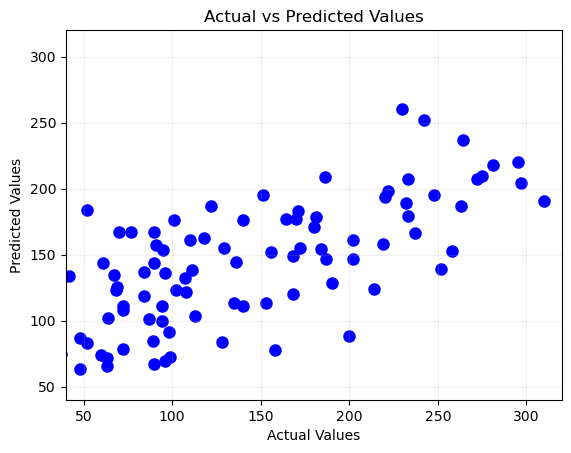

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# linear regression object with SGD
#sgd_regressor = SGDRegressor(max_iter=2000, tol=1e-3)
sgd_regressor = SGDRegressor(max_iter=50000,penalty='l1', alpha = 0.2)
#sgd_regressor = SGDRegressor(alpha=0.001)
#sgd_regressor = SGDRegressor(penalty='elasticnet', l1_ratio=0.2)
# sgd_regressor = SGDRegressor(max_iter=10000,penalty='elasticnet', l1_ratio=0.7)


# train the model
sgd_regressor.fit(X_train, y_train)

# make predictions
y_pred = sgd_regressor.predict(X_test)

# these will become important as we vary our loss function
print('\nCoefficients: \n', sgd_regressor.coef_)
print('\nMean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('\nCoefficient of determination: %.2f \n' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(40,320)
plt.ylim(40,320)
plt.title('Actual vs Predicted Values')
plt.grid(alpha=0.2)

____

<font size=+2 color=#FFAA00> Impact on Score </font>

____

Make a plot that shows the scoring metrics versus the regularization value for L1, L2, and EN. You probably want this to be a linear-log plot. Discuss with your group and summarize in a markdown cell what you find. In particular, are there values where the prediction is mostly unaffected? Is the value at which big changes appear the same for each regularizer? How extreme does the regularization need to be to significantly impact the score? 

### Answer:
### This is code to see the trend of increasing the alpha and its relation with the Coefficient of Determination(R2) and Mean squared error, MSE. For alpha range from 10e-5 to 10e-3 and from 3 to 10e2, the metrics values are not change which can be considered as the prediction is the same. 
### And the big changes happen differently for different penalty parameters, l1 is different a lot from the other two. Change alpha from 1 to 3 of l1 regularizer. The MSE and R^2 have a big changes.for l2 and EN is happen at [1e-3:1].

### If the alpha is around the the range we find the above for the big changes. That will have a significantly impact on the score.

/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

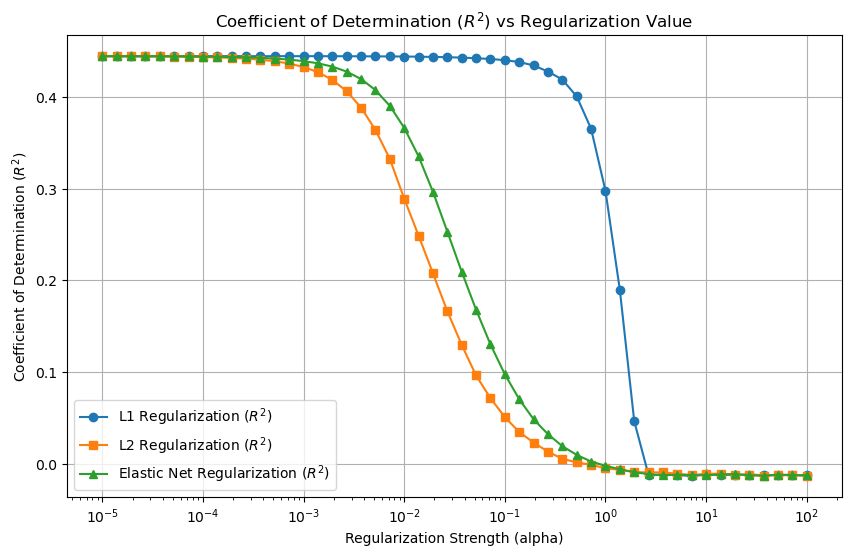

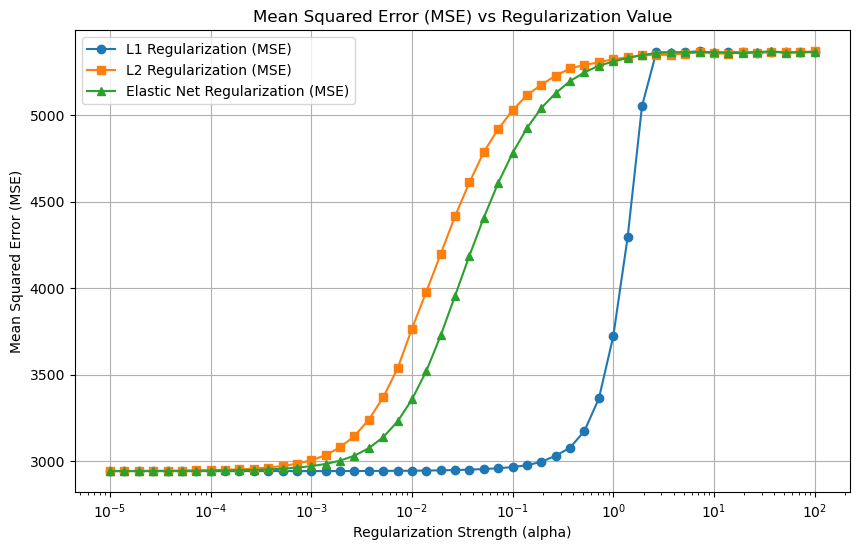

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)
# Regularization values to test
alphas = np.logspace(-5, 2, 50)
# Initialize lists to store metrics for each regularization type
mse_l1 = []
r2_l1 = []

mse_l2 = []
r2_l2 = []

mse_en = []
r2_en = []

# Test different regularization strengths for L1, L2, and Elastic Net
for alpha in alphas:
    # L1 regularization
    sgd_regressor_l1 = SGDRegressor(penalty='l1', alpha=alpha, max_iter=2000, tol=1e-3)
    sgd_regressor_l1.fit(X_train, y_train)
    y_pred_l1 = sgd_regressor_l1.predict(X_test)
    mse_l1.append(mean_squared_error(y_test, y_pred_l1))
    r2_l1.append(r2_score(y_test, y_pred_l1))

    # L2 regularization
    sgd_regressor_l2 = SGDRegressor(penalty='l2', alpha=alpha, max_iter=2000, tol=1e-3)
    sgd_regressor_l2.fit(X_train, y_train)
    y_pred_l2 = sgd_regressor_l2.predict(X_test)
    mse_l2.append(mean_squared_error(y_test, y_pred_l2))
    r2_l2.append(r2_score(y_test, y_pred_l2))

    # Elastic Net regularization
    sgd_regressor_en = SGDRegressor(penalty='elasticnet', alpha=alpha, max_iter=2000, tol=1e-3, l1_ratio=0.5)
    sgd_regressor_en.fit(X_train, y_train)
    y_pred_en = sgd_regressor_en.predict(X_test)
    mse_en.append(mean_squared_error(y_test, y_pred_en))
    r2_en.append(r2_score(y_test, y_pred_en))
# Plotting R2
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, r2_l1, label='L1 Regularization ($R^2$)', marker='o')
plt.semilogx(alphas, r2_l2, label='L2 Regularization ($R^2$)', marker='s')
plt.semilogx(alphas, r2_en, label='Elastic Net Regularization ($R^2$)', marker='^')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient of Determination ($R^2$)')
plt.title('Coefficient of Determination ($R^2$) vs Regularization Value')
plt.legend()
plt.grid(True)
plt.show()
# Plotting MSE
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mse_l1, label='L1 Regularization (MSE)', marker='o')
plt.semilogx(alphas, mse_l2, label='L2 Regularization (MSE)', marker='s')
plt.semilogx(alphas, mse_en, label='Elastic Net Regularization (MSE)', marker='^')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs Regularization Value')
plt.legend()
plt.grid(True)
plt.show()

____

<font size=+2 color=#FFAA00> Regularization Paths </font>

____

You should be able to access the model's post-training parameters. Plot the parameters versus the strength of the regularization for L1, L2 and EN. Comment in a markdown cell on what your group learned. 

Comment on whether your paths suggest which [features are the most important](https://scikit-learn.org/stable/_images/sphx_glr_plot_select_from_model_diabetes_thumb.png)? And, which regularizer is the best indicator: L1, L2, or EL? 


/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

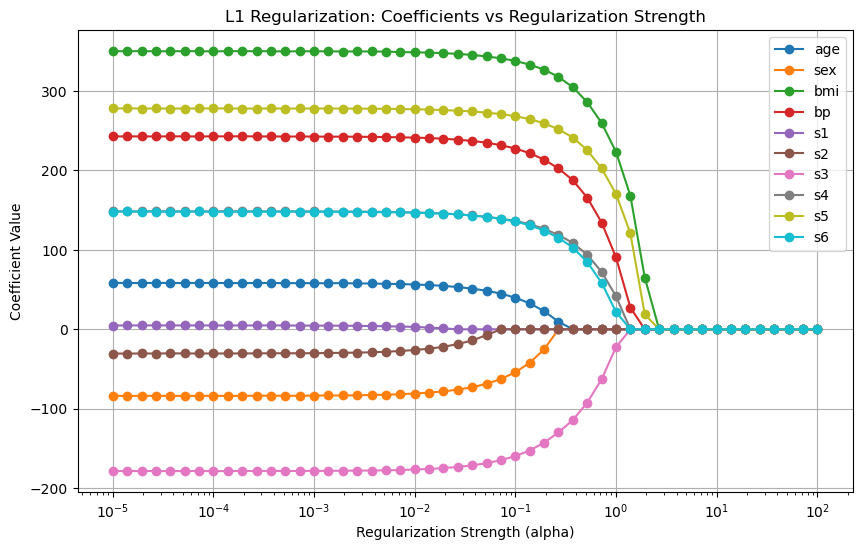

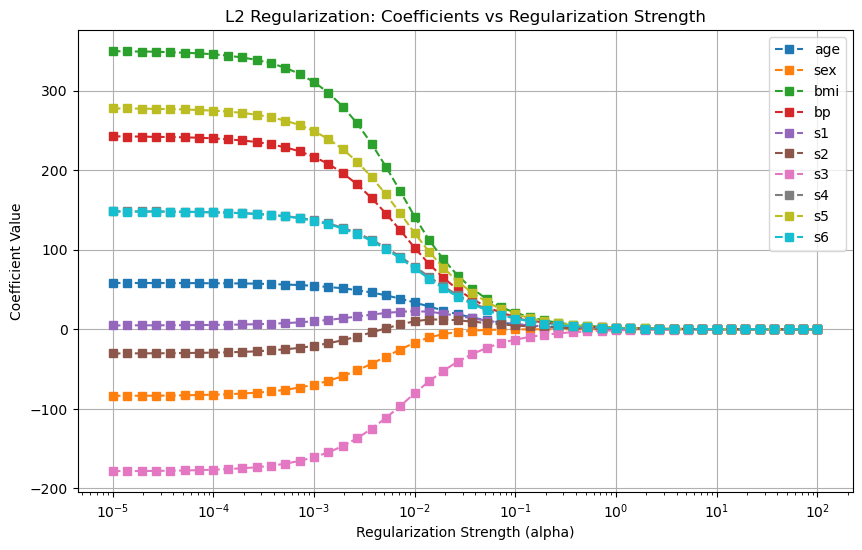

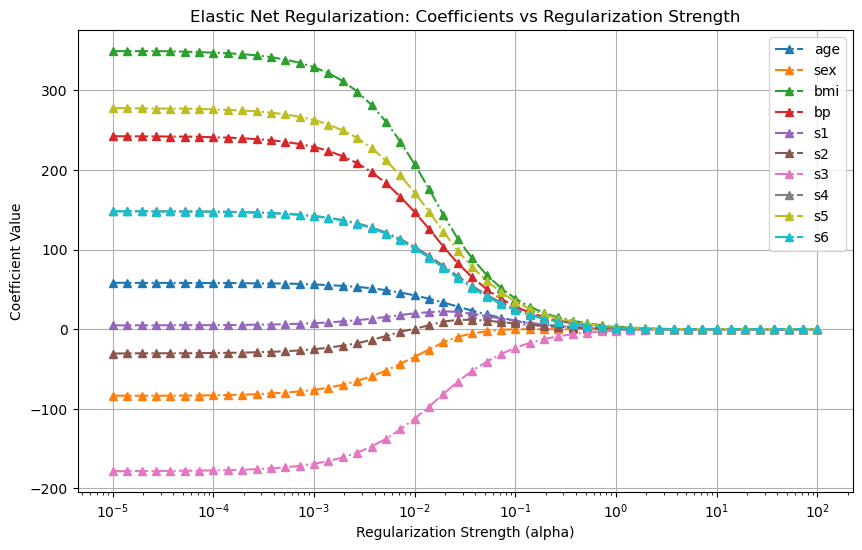

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
feature_names = diabetes.feature_names
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Regularization values to test
alphas = np.logspace(-5, 2, 50)

# Initialize lists to store coefficients for each regularization type
coeffs_l1 = []
coeffs_l2 = []
coeffs_en = []

# Test different regularization strengths for L1, L2, and Elastic Net
for alpha in alphas:
    # L1 regularization
    sgd_regressor_l1 = SGDRegressor(penalty='l1', alpha=alpha, max_iter=2000, tol=1e-3)
    sgd_regressor_l1.fit(X_train, y_train)
    coeffs_l1.append(sgd_regressor_l1.coef_)

    # L2 regularization
    sgd_regressor_l2 = SGDRegressor(penalty='l2', alpha=alpha, max_iter=2000, tol=1e-3)
    sgd_regressor_l2.fit(X_train, y_train)
    coeffs_l2.append(sgd_regressor_l2.coef_)

    # Elastic Net regularization
    sgd_regressor_en = SGDRegressor(penalty='elasticnet', alpha=alpha, max_iter=2000, tol=1e-3, l1_ratio=0.5)
    sgd_regressor_en.fit(X_train, y_train)
    coeffs_en.append(sgd_regressor_en.coef_)

# Convert lists to numpy arrays for plotting
coeffs_l1 = np.array(coeffs_l1)
coeffs_l2 = np.array(coeffs_l2)
coeffs_en = np.array(coeffs_en)

# Plotting coefficients versus regularization strength for L1
plt.figure(figsize=(10, 6))
for i in range(coeffs_l1.shape[1]):
    plt.semilogx(alphas, coeffs_l1[:, i], label=f'{feature_names[i]}', linestyle='-', marker='o')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient Value')
plt.title('L1 Regularization: Coefficients vs Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()

# Plotting coefficients versus regularization strength for L2
plt.figure(figsize=(10, 6))
for i in range(coeffs_l2.shape[1]):
    plt.semilogx(alphas, coeffs_l2[:, i], label=f'{feature_names[i]}', linestyle='--', marker='s')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient Value')
plt.title('L2 Regularization: Coefficients vs Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()

# Plotting coefficients versus regularization strength for Elastic Net
plt.figure(figsize=(10, 6))
for i in range(coeffs_en.shape[1]):
    plt.semilogx(alphas, coeffs_en[:, i], label=f'{feature_names[i]}', linestyle='-.', marker='^')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient Value')
plt.title('Elastic Net Regularization: Coefficients vs Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()

### Answer:
At the start point you can see the weight value for each feature and we will have a knowledge of how the feature important to the prediction. From all penalty parameters we selected we can see that if the absolute weight coeff for a feature is large, as alpha increase,for l1 and l2 regularizer, the weight of important features will always converge later than the other feature weights. 



### We think L1 regularizer work the best because it has the property of inducing sparsity in the model, meaning it encourages some of the coefficients to be exactly zero. This property is beneficial for feature selection, especially in datasets with many features like the diabetes dataset. L1 regularization tends to select a subset of the most informative features while setting the coefficients of irrelevant or less important features to zero. In medical datasets like diabetes, where not all features may be equally relevant for predicting the target variable (diabetes progression), L1 regularization can help identify the most relevant features associated with the disease. L1 regularization also helps prevent overfitting by reducing the model's complexity through feature selection. 

____

<font size=+2 color=#FFAA00> Optimal Regularization </font>

____

Discuss with your group how you would find the <font color=#AAFFCC>best value</font> of the regularization parameter. Write your answer, in detail, in a markdown cell. Use equations and plots if it helps. 

By the way, I found this code, not sure if it is useful for not......

/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin


Best Parameters:  {'alpha': 0.01, 'l1_ratio': 0.3, 'penalty': 'l1'}
Best Score (Negative MSE):  -3178.6735632473915
Mean squared error: 2862.16
Coefficient of determination: 0.46 



/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


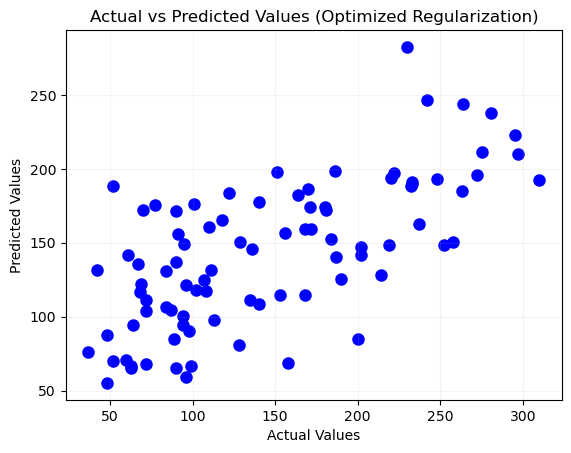

In [52]:

diabetes = datasets.load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(max_iter=5000, tol=1e-3)

param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],  # Example range, adjust based on your needs
    'penalty': ['l2','l1','elasticnet'],  # Regularization types to try
    'l1_ratio': [0.01, 0.05, 0.1, 0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1]
    }

grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("\nBest Parameters: ", grid_search.best_params_)
print("Best Score (Negative MSE): ", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f \n' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Optimized Regularization)')
plt.grid(alpha=0.15)
plt.show()


The L1 penalty with a ratio of 0.01 works the best with a mean squared error of 2862.16, it suggests that a sparse solution is preferred for the problem at hand. This means that only a small subset of features is contributing significantly to the model's performance, while the rest might be irrelevant or redundant. The regularization helps in selecting these important features and reducing overfitting, leading to better generalization to unseen data. Additionally, a small value of the regularization parameter indicates that the model is not overly penalized, allowing the coefficients to adjust more freely while still preventing overfitting. If we increase the number of iteration it might be preform better than the result we hav right now. 


____

<font size=+2 color=#FFAA00> Polynomial Features </font>

____

Study the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) library. Summarize, in a markdown cell, what it can do, what it returns, etc.

Take the diabetes data and create polynomial features from it. 

Does your base model from the very top of this notebook improve with polynomial features (of any order)? If yes, why do you think that is? If the result got worse, think about how that could happen. What else do you observe? Maybe the code is slower, requires more iterations, ...   Put comments in a markdown cell. 

---

The PolynomialFeatures class in scikit-learn is a preprocessing technique used to generate polynomial features from the original features of a dataset. It can be helpful in capturing non-linear relationships between features and the target variable, thus enhancing the performance of linear models.

What it can do:

* Generate polynomial features up to a specified degree from the original features.
* Create interaction features by multiplying different features together.

Parameters:

* degree: The degree of the polynomial features to be generated. It determines the maximum degree of the polynomial features. Default is 2.
* interaction_only: If set to True, only interaction features are produced, i.e., features that are the product of distinct inputs. Default is False.
* include_bias: If set to True, a bias column (intercept term) will be added. Default is True.

Methods:

* fit(X[, y]): Compute the polynomial features for the given dataset.
* transform(X): Transform the dataset into polynomial features.
* fit_transform(X[, y]): Fit to data, then transform it.

---


Coefficients: 
 [   0.          -78.77921559  478.17434258  269.32471702    0.
    0.         -163.88637227   56.05172263  342.47778543   68.90197576
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]

Mean squared error: 2834.50

Coefficient of determination: 0.47 



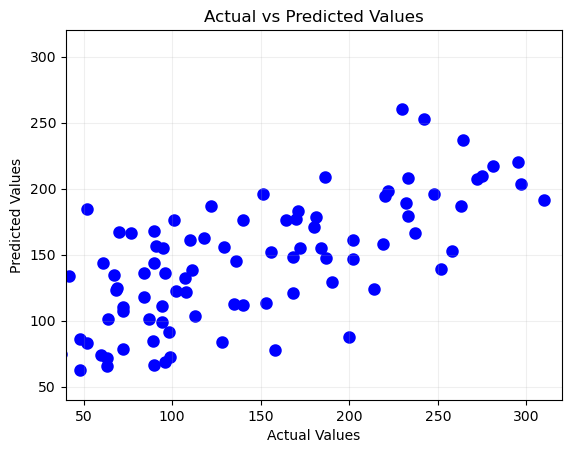

In [54]:
from sklearn.preprocessing import PolynomialFeatures


# Load the diabetes dataset
diabetes = datasets.load_diabetes()
feature_names = diabetes.feature_names

poly_features = PolynomialFeatures(degree=2, include_bias=False)
diabetes_poly = poly_features.fit_transform(diabetes.data)
X_train_p, X_test_p, y_train, y_test = train_test_split(diabetes_poly, diabetes.target, test_size=0.2, random_state=42)

# linear regression object with SGD
# sgd_regressor = SGDRegressor(max_iter=2000, tol=1e-3)
sgd_regressor = SGDRegressor(max_iter=20000,penalty='l1', alpha = 0.2)
#sgd_regressor = SGDRegressor(alpha=0.001)
# sgd_regressor = SGDRegressor(max_iter=10000,penalty='elasticnet', l1_ratio=0.7)
# train the model
sgd_regressor.fit(X_train_p, y_train)

# make predictions
y_pred = sgd_regressor.predict(X_test_p)

# these will become important as we vary our loss function
print('\nCoefficients: \n', sgd_regressor.coef_)
print('\nMean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('\nCoefficient of determination: %.2f \n' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(40,320)
plt.ylim(40,320)
plt.title('Actual vs Predicted Values')
plt.grid(alpha=0.2)

In [51]:
X_train_p.shape,X_train.shape

((353, 65), (353, 10))

### The result improved with the updated model (sgd_regressor = SGDRegressor(max_iter=20000, penalty='l1', alpha=0.2)), it suggests that the model might have benefited from the increased flexibility provided by a higher number of iterations and a higher regularization strength. The Mean Squared Error (MSE) decreasing from 2862.16 to 2834.50 indicates that the updated model is performing better in terms of minimizing prediction errors on the dataset.

### And the performance improves also may benefit from adding polynomial features in following reasons:

* ### Capturing Non-linear Relationships: Polynomial features allow the model to capture non-linear relationships between features and the target variable. This can lead to a better fit to the underlying data distribution, resulting in improved predictive performance.

* ### Increased Feature Space: Adding polynomial features increases the feature space, providing the model with more information to learn from. This increased complexity may better represent the underlying data, leading to improved performance.

* ### Better Regularization: Regularization techniques like L1 penalty can help in feature selection by encouraging sparsity in the coefficient estimates. With the expanded feature space from polynomial features, regularization can effectively select the most relevant features, leading to improved model performance.

____

<font size=+2 color=#FFAA00> Put it all together.... </font>

____

Make regularization path plots using polynomial features and comment on your findings. Do you see any surprises? 

/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/yaman/anaconda3/li

/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/yaman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


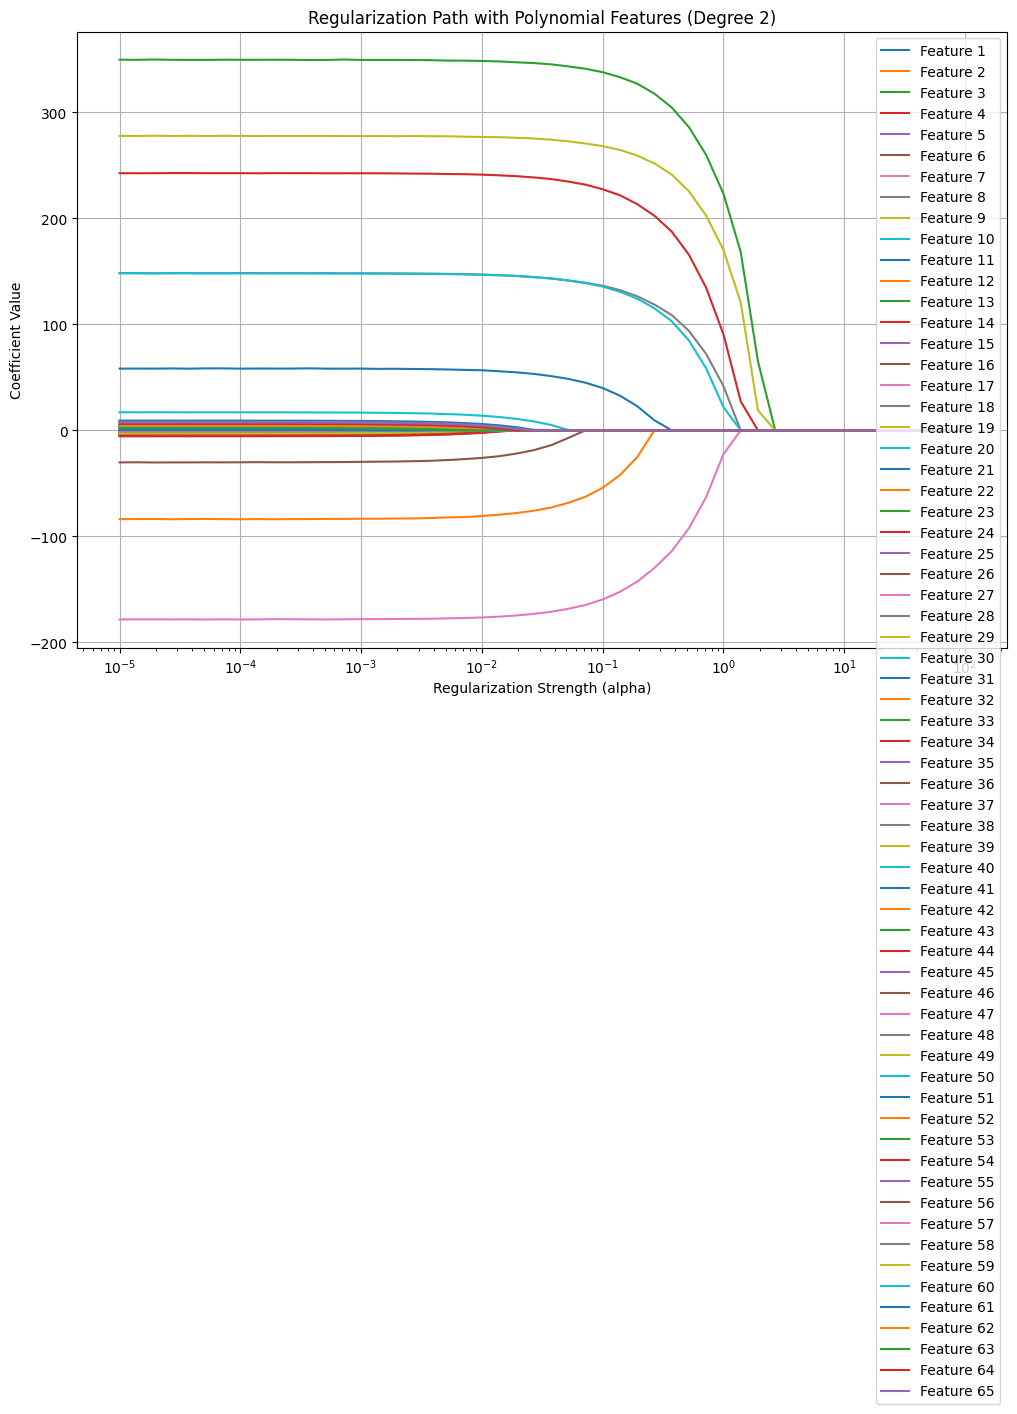

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Create polynomial features
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(diabetes.data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, diabetes.target, test_size=0.2, random_state=42)

# Regularization values to test
alphas = np.logspace(-5, 2, 50)

# Initialize lists to store coefficients for each value of alpha
coeffs = []

# Test different values of alpha
for alpha in alphas:
    sgd_regressor = SGDRegressor(max_iter=2000, tol=1e-3, penalty='l1', alpha=alpha)
    sgd_regressor.fit(X_train, y_train)
    coeffs.append(sgd_regressor.coef_)

# Convert to numpy array for plotting
coeffs = np.array(coeffs)

# Plotting regularization path
plt.figure(figsize=(12, 8))
for feature in range(coeffs.shape[1]):
    plt.plot(alphas, coeffs[:, feature], label=f'Feature {feature+1}')

plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient Value')
plt.title('Regularization Path with Polynomial Features (Degree 2)')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()



### In the regularization path plots using polynomial features, the features are the transformed variables obtained after applying polynomial expansion to the original features of the diabetes dataset. Specifically, each feature represents a combination of the original features, raised to different powers based on the degree of polynomial features.

### Since we're using polynomial features with a degree of 2 (degree=2), the features in the regularization path plots are combinations of the original features up to the second degree. This includes not only the original features themselves but also their squared terms and interactions between different features.

### Surprises
